In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [341]:
df = pd.read_csv("matches.csv")

## first 5 rows of the raw data:

In [342]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## rows and columns:
there are 636 rows and 18 columns

In [343]:
df.shape

(636, 18)

## column informations:

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

Winner column is a possible target variable

If there are less than 636 non null rows in a column, then the rest are null values

## Analysing Missing Values

In [345]:
df.isna().sum().sort_values(ascending = False)

umpire3            636
city                 7
winner               3
player_of_match      3
umpire2              1
umpire1              1
venue                0
win_by_wickets       0
win_by_runs          0
id                   0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

umpire3 column completely is empty so we can remove it.

In [346]:
df.drop(columns = "umpire3", inplace = True)

In [347]:
df[df["city"].isna() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


all the matches with missing city, happened in dubai international stadium, so city = dubai

In [348]:
df["city"] = df["city"].fillna("Dubai")

In [349]:
df[df["player_of_match"].isna() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [350]:
df[df["result"] == "no result"]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


player_of_match and Winner is NaN because the result type is "no result", it is a legit data,
we can mask it

In [351]:
df["winner"] = df["winner"].fillna("no")
df["player_of_match"] = df["player_of_match"].fillna("no")

In [352]:
df[df["umpire2"].isna() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [353]:
df[df["umpire1"].isna() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


We can drop the rows with null values in "umpire1" and "umpire2" columns as there is only 1 such row, and dropping 1 row, wont affect the model much

In [354]:
df.drop(index = 4, inplace = True)

In [355]:
df.isna().sum().sort_values(ascending = False)

id                 0
dl_applied         0
umpire1            0
venue              0
player_of_match    0
win_by_wickets     0
win_by_runs        0
winner             0
result             0
season             0
toss_decision      0
toss_winner        0
team2              0
team1              0
date               0
city               0
umpire2            0
dtype: int64

All missing values are handled successfully

## Analysing duplicates

In [356]:
df.duplicated().sum()

0

There are no duplicate values

## Handling Outliers

In [357]:
numeric_col = list(df.select_dtypes(include = ["int64","float64"]).columns)
numeric_col.remove("id")
numeric_col.remove("dl_applied")
numeric_col

['season', 'win_by_runs', 'win_by_wickets']

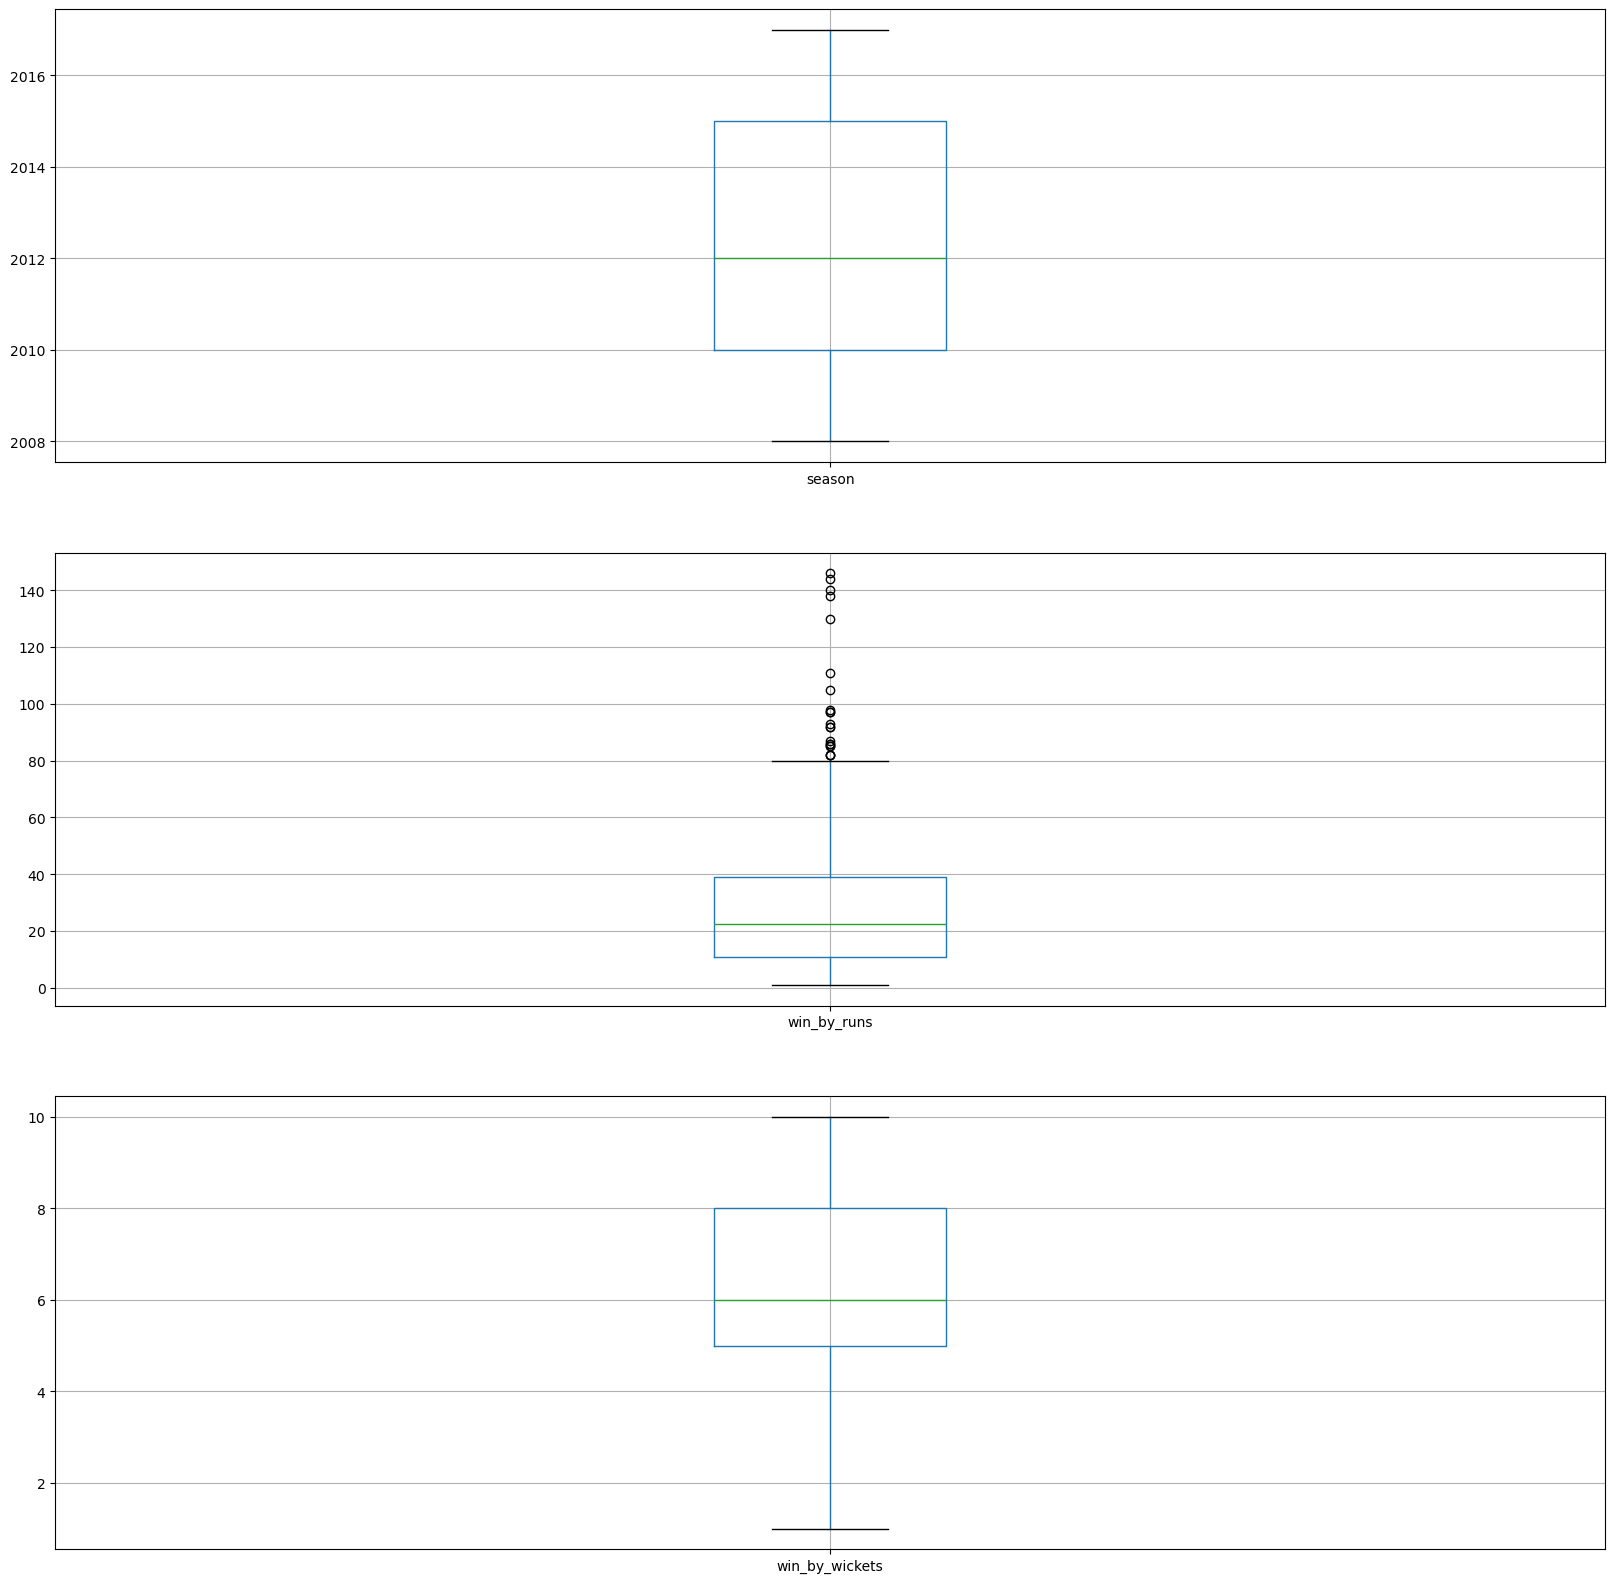

In [358]:
fig = plt.figure(figsize = (20,20))
i = 1
for column in numeric_col:
    plt.subplot(len(numeric_col),1,i)
    i += 1
    df[df[column]>0][[column]].boxplot()

plt.show()


win_by_wickets and win_by_runs needed to be handled properly because, there are lot of zeroes in both which is because only one of the column can have a positive value in an observation, so while calculating outliers the 0 rows should be removed.

In [359]:
# Mean of non-zero values
win_by_runs_p = df[df["win_by_runs"] > 0]["win_by_runs"].mean()

# Set column name
column = "win_by_runs"

# Only consider non-zero values for outlier detection
non_zero_values = df[df[column] > 0][column]

# Calculate IQR
Q1 = non_zero_values.quantile(0.25)
Q3 = non_zero_values.quantile(0.75)
IQR = Q3 - Q1
mini = Q1 - 1.5 * IQR
maxi = Q3 + 1.5 * IQR

# Create a mask for the full df, matching indices of non-zero outliers
outlier_mask = (df[column] > maxi) | ((df[column] < mini) & (df[column] > 0))

# Replace outliers with mean
df.loc[outlier_mask, column] = int(win_by_runs_p)


Outliers are sucessfully handled

## Exploratory Data Analysis:

C:\Users\Rishwanth J V K\AppData\Local\Temp\ipykernel_22132\986933942.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(df["winner"].value_counts(), ci = False)


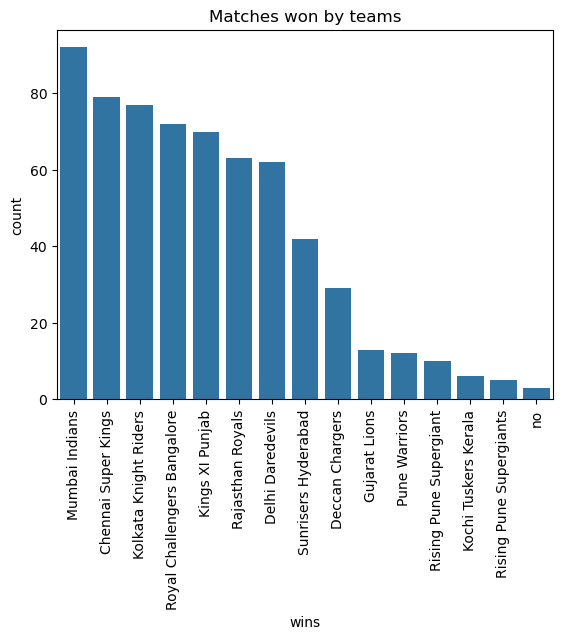

In [397]:
sns.barplot(df["winner"].value_counts(), ci = False)
plt.title("Matches won by teams")
plt.xlabel("wins")
plt.xticks(rotation = 90)
plt.show()

Conclusion: Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders, Royal Challengers Banglore, Kings XI Punjab, Delhi Daredevils are the main teams and Sun Rising Hyderabad to some extent, other teams havent wont much titles

C:\Users\Rishwanth J V K\AppData\Local\Temp\ipykernel_22132\1952364465.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(df["venue"].value_counts(), ci = False)


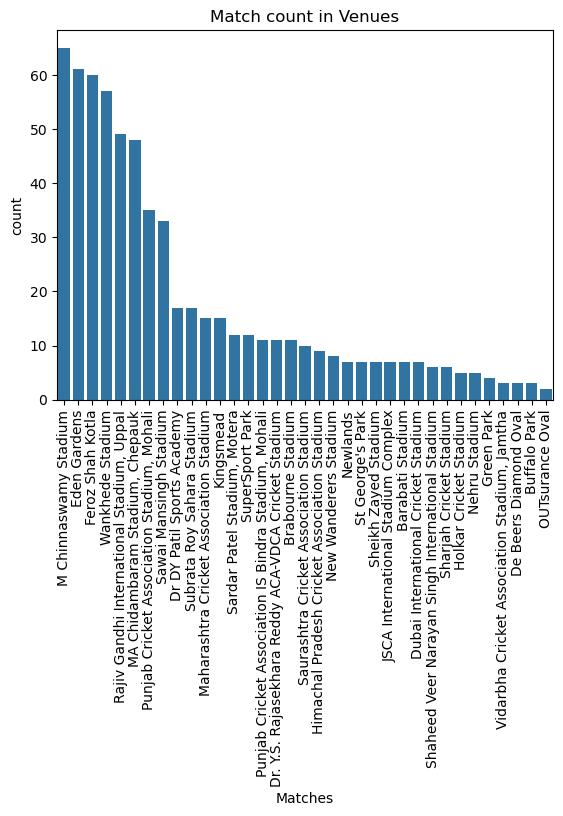

In [399]:
sns.barplot(df["venue"].value_counts(), ci = False)
plt.title("Match count in Venues")
plt.xticks(rotation = 90)
plt.xlabel("Matches")
plt.show()


COnclusions: M Chinnaswamy Stadium, Eden Gardens, Feroz Shah Kotla, Wankhede Stadium, MA Chidambaram stadium, Punjab Cricket Association Stadium, Sawai Mansingh stadium are the most played stadiums, no. of matches played significantly decreases after that

C:\Users\Rishwanth J V K\AppData\Local\Temp\ipykernel_22132\958738752.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(df["player_of_match"].value_counts().head(10), ci = False)


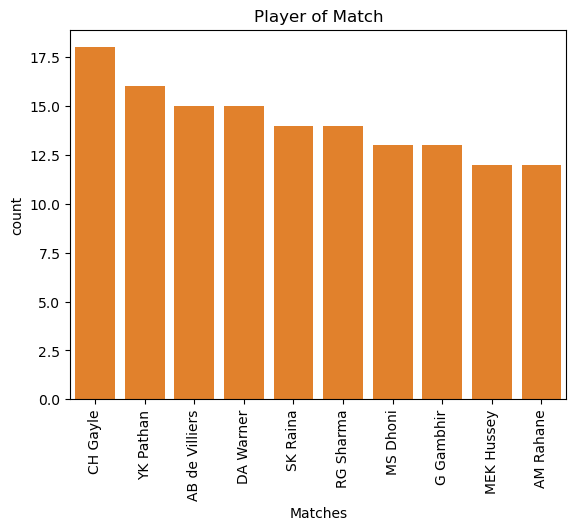

In [401]:
sns.barplot(df["player_of_match"].value_counts().head(10), ci = False)
plt.title("Player of Match")
plt.xticks(rotation = 90)
plt.xlabel("Matches")
plt.show()


## Feature Engineering:

## Encoding:

In [369]:
obj_cols = df.select_dtypes(include = ["object"]).columns
obj_cols

Index(['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [361]:
# df["date"] = pd.to_datetime(df["date"])

In [372]:
nominal = ['city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'venue']
ordinal = ['player_of_match','umpire1', 'umpire2']
encode = ColumnTransformer(transformers = [("one_hot",OneHotEncoder(sparse_output = False),nominal),("ordinal",OrdinalEncoder(),ordinal)],remainder= "passthrough")
df2 = pd.DataFrame(encode.fit_transform(df), columns = encode.get_feature_names_out())
df2

,one_hot__city_Abu Dhabi,one_hot__city_Ahmedabad,one_hot__city_Bangalore,one_hot__city_Bloemfontein,one_hot__city_Cape Town,one_hot__city_Centurion,one_hot__city_Chandigarh,one_hot__city_Chennai,one_hot__city_Cuttack,one_hot__city_Delhi,...,one_hot__venue_Wankhede Stadium,ordinal__player_of_match,ordinal__umpire1,ordinal__umpire2,remainder__id,remainder__season,remainder__date,remainder__dl_applied,remainder__win_by_runs,remainder__win_by_wickets
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,199.0,5.0,23.0,1,2017,2017-04-05,0,35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,176.0,1.0,33.0,2,2017,2017-04-06,0,0,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30.0,27.0,11.0,3,2017,2017-04-07,0,0,10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,56.0,2.0,9.0,4,2017,2017-04-08,0,0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,154.0,0.0,23.0,6,2017,2017-04-09,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,191.0,1.0,7.0,632,2016,2016-05-22,0,0,6
631,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,2.0,14.0,633,2016,2016-05-24,0,0,4
632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,103.0,24.0,9.0,634,2016,2016-05-25,0,22,0
633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,38.0,24.0,11.0,635,2016,2016-05-27,0,0,4


## Hypothesis Testing

Hypothesis 1:<br>
H0: CSK's victory is independent of the venue<br>
H1: CSK's probability of winning is higher if it plays in its home ground

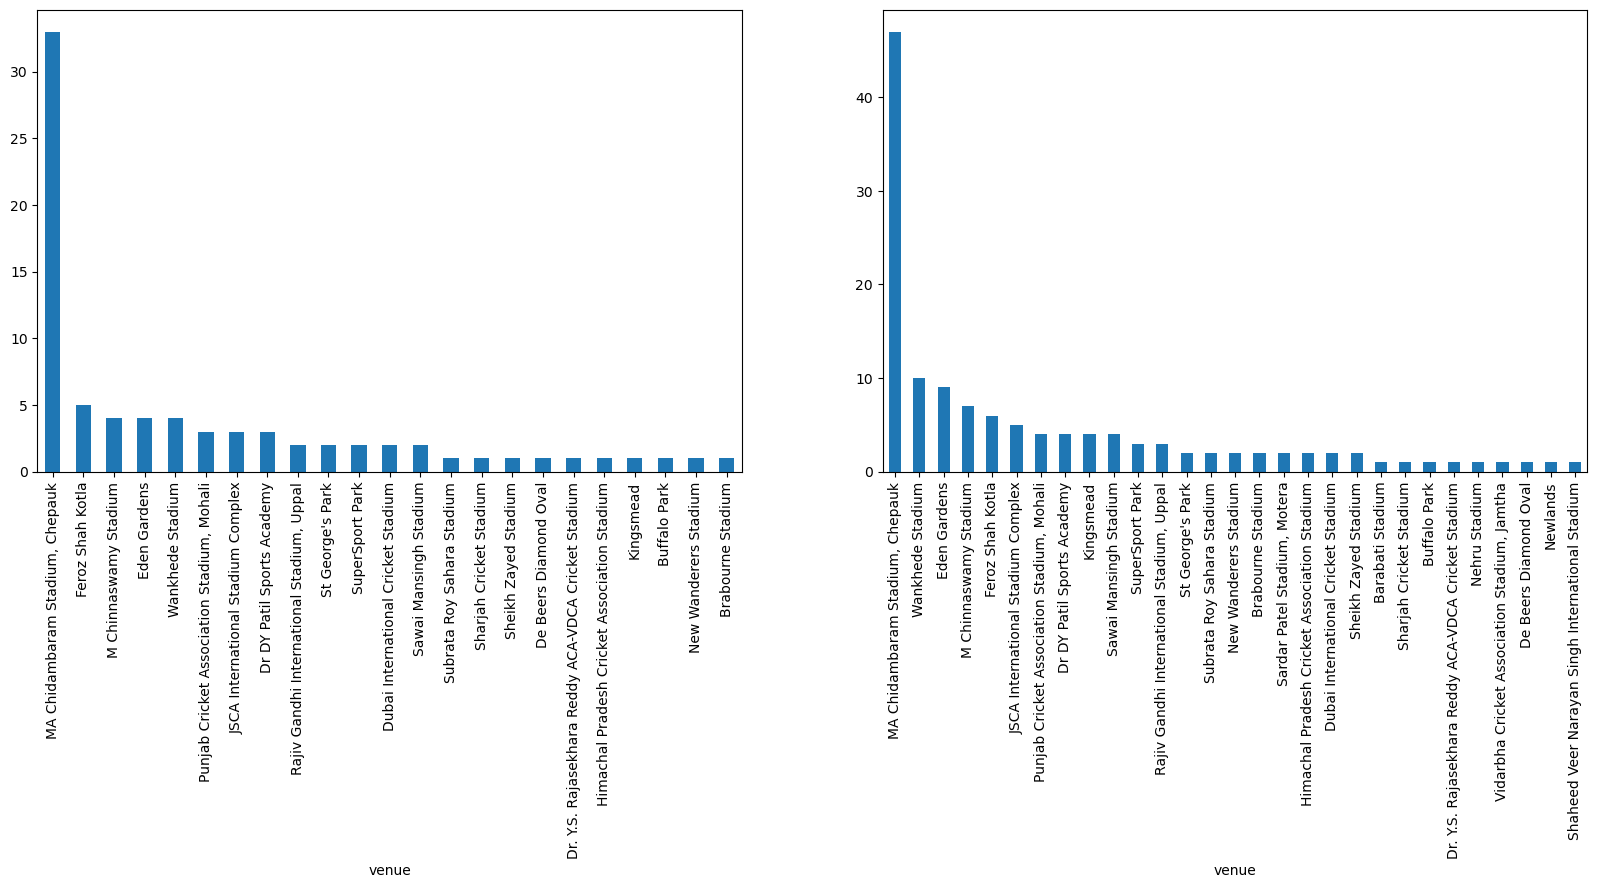

In [445]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))
df[df["winner"] == "Chennai Super Kings"]["venue"].value_counts().plot(kind = "bar",ax = ax1)
df[(df["team1"] == "Chennai Super Kings") | (df["team2"] == "Chennai Super Kings")]["venue"].value_counts().plot(kind = "bar",ax = ax2)
plt.show()

In [437]:
k1 = df[(df["team1"] == "Chennai Super Kings") | (df["team2"] == "Chennai Super Kings")]["winner"].value_counts().reset_index(name = "count")
gen_o = k1[k1["winner"] != "Chennai Super Kings"]["count"].sum()
gen_c = k1[k1["winner"] == "Chennai Super Kings"]["count"].sum()
k2 = df[((df["team1"] == "Chennai Super Kings") | (df["team2"] == "Chennai Super Kings")) & (df["venue"] == "MA Chidambaram Stadium, Chepauk")]["winner"].value_counts().reset_index(name = "count")
chin_o = k2[k2["winner"] != "Chennai Super Kings"]["count"].sum()
chin_c = k2[k2["winner"] == "Chennai Super Kings"]["count"].sum()
print("General probability of winning for csk: ", (gen_c*100)/(gen_c+ gen_o),"\b%")
print("probability of winning for csk in homeground: ", (chin_c*100)/(chin_c+ chin_o),"\b%")

General probability of winning for csk:  60.30534351145038%
probability of winning for csk in homeground:  70.2127659574468%


Hypothesis 2:<br>
H0: winning the match is independent of winning the toss <br>
H1: winning the toss increases the probability of winning the match

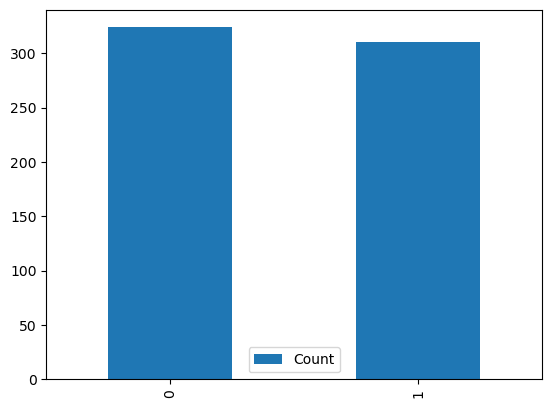

In [460]:
result_dict = {
    "Match Result": ["winner = toss_winner", "winner ≠ toss_winner"],
    "Count": [
        df[df["winner"] == df["toss_winner"]]["id"].count(),
        df[df["winner"] != df["toss_winner"]]["id"].count()
    ]
}
pd.DataFrame(result_dict).plot(kind = "bar")
plt.show()

Hypothesis 3:<br>
H0: winning is independent of choosing to bat or field<br>
H1: choosing to bat first increases the probability of winning

In [462]:
df[df["win_by_runs"] != 0]["id"].count()

286

In [461]:
df[df["win_by_runs"] == 0]["id"].count()

349

we will assume significance level as 0.05

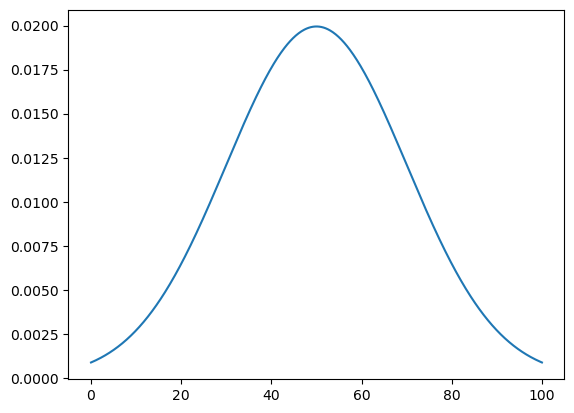

In [467]:
from scipy import stats
x = np.linspace(0,100,635)
y = stats.norm.pdf(x,50,20)
plt.plot(x,y)
plt.show()

In [468]:
1 - stats.binom.cdf(348,635,0.5)

0.00690761841171772

Since it is well below significance level, we can ignore the null hypothesis, and conclude that choosing to bat first will improve your probability to win

## Conclusions

we have cleaned the data set by handling missing values, duplicates and outliers, we did EDA and found popular stadiums, best teams and top players. We have also proposed 3 hypothesis, and did 1 hypothesis in detail. We thereby came to know that choosing to bat first can improve your chances of winning.